# 크롤링 테스트

In [1]:
import os
import sys
import urllib.request

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 함수로 정의 / txt 파일로 저장

import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

# 크롤링 실습

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 불필요한 내용 제거

In [5]:
data=pd.read_csv("/content/drive/MyDrive/outlier/이재명.csv")
#data=data['comment']
data

,tweet,date,retweets_count,link
0,윤석열 vs 이재명 인성 논란 이 영상 하나로 종결 짓습니다 심각한 언론 형평성 4...,2021-11-22,0,https://twitter.com/SungJun_777/status/1462764...
1,jtkim1013 좌파들아 이재명을 구속해 그래야 윤돌이도 구속하지,2021-11-22,0,https://twitter.com/sosara609/status/146276435...
2,지도부 빼고 취준생 앉히고 이재명 부동산 대장동 반성 사과 B98BA8fnHt,2021-11-22,0,https://twitter.com/love2poem/status/146276434...
3,TheMinjoo_Kr 국힘당 보다 수준 떨어지는 만주당 상태 북한까지 이재명의 ...,2021-11-22,0,https://twitter.com/lanotte702/status/14627642...
4,진성준 아주 무례하고 개매너인 거 이재명을 위해 온 몸을 바쳐 막아가며 소리지르고 ...,2021-11-22,1,https://twitter.com/digidigi0208/status/146276...
...,...,...,...,...
59875,harry_iniyuni siquessi 아뇨 빗대어 앞으로 새로운 세대와 어울릴...,2021-11-13,0,https://twitter.com/cdsd1053/status/1459529194...
59876,Chosun 저런거 다 필요없다 종좌스 콘크리트지지층 때문에 진정한 야권단일화 없...,2021-11-13,0,https://twitter.com/shprgjb/status/14595291360...
59877,이재명 복지 늘려야 성장 시도 안 하면 영원히 불가능 다음뉴스 lm8oP5RLYR,2021-11-13,3,https://twitter.com/earn75e/status/14595290321...
59878,Jaemyung_Lee 절대 포기하지 않으시길 믿습니다 대한민국의 모든 국민들은 ...,2021-11-13,0,https://twitter.com/NqzmBREJiv23sQj/status/145...


In [6]:
# 한글과 띄어쓰기만 추출
import re
result=[]
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
#hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

for i in range(len(data)):
  result.append(hangul.sub('', data['tweet'][i])) 
result

['윤석열  이재명 인성 논란 이 영상 하나로 종결 짓습니다 심각한 언론 형평성   ',
 '  좌파들아 이재명을 구속해 그래야 윤돌이도 구속하지 ',
 '지도부 빼고 취준생 앉히고 이재명 부동산 대장동 반성 사과 ',
 '  국힘당 보다 수준 떨어지는 만주당 상태 북한까지 이재명의 썩은내가 진동하나보네 민주당은 이재명 같은 전과범을 후보랍시고 내놓은걸 부끄러워 해야지',
 '진성준 아주 무례하고 개매너인 거 이재명을 위해 온 몸을 바쳐 막아가며 소리지르고 난리치는 거 다 봤다 저 개 양아치스러운 짓거리를 계속 보고 있어야 하다니 대장동이 이재명하고 관련 없어 보이려고 아주 발악을 하는데 그때마다 더 의심스럽다 ',
 ' 이재명의 민주당 일차 자세 낮추고 반성 만 번 언급 출처 서울경제 네이버 뉴스 ',
 '  진짜 나쁜넘 이네요 무능하고 ',
 '이재명은 진짜 에렌예거랑 비슷한거같아',
 '요즘 유행어 이것 보고 이재명 찍기로 했다 전국적인 포털 댓글자들의 움직임 ',
 '  정말로 용서할 수 없는 일 허경영 대통령 ',
 '본인  메신져에 올려 알립시다 이재명은 무능 합니다 이재명은 무지 합니다 이재명은 무책임 합니다 이재명절대안찍어 이재명낙선운동무조건한다',
 '윤석열이 장모는 범죄자 맞지 이재명은 그렇게 털었는데 뭐 나왔지 느그 곽쌍도가 억 처먹은거밖에 안나왔자너 ',
 '이재명부인 김혜경요',
 '  진태님이 이재명의 실체를 알리려고 노력분투 하는 길에 방해들 하면 안됨니다 이해득실에 매여 있는 자들이여 ',
 '  정말로 용서할 수 없는 일 허경영 대통령 ',
 '  이재명 하나 때문에 국회의원 전체가 탄핵 당한다고 정신차려라 니가 이재명에게 무슨 약점을 잡혀 있는지는 몰라도 그건 너 하나 문제로 끝내면 될 것 넌 지금 나라 말아먹을 짓을 하고 있는것이다 전국민이 대장동게이트 주범은 이재명이라고 모두 확신하고 있다 손바닥으로 하늘을 가리지마라',
 '   너나 잘하세요 ',
 '  명심캠핑보고  진행자들이끝까지남자분여자분하는데 이름기억하고불러야합니다

In [7]:
for k in range(len(result)):
  result[k]=result[k].replace('\n',' ')
  result[k]=result[k].replace('\t',' ')

# 불필요한 내용 제거
   

In [8]:
#result_split = result.split('포스팅 내용')
#result_split[1]
#result_split
result[0]

'윤석열  이재명 인성 논란 이 영상 하나로 종결 짓습니다 심각한 언론 형평성   '

In [9]:
file = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt',"w", encoding='utf-8')
file.write(str(result))
file.close()

# 형태소 분석

In [10]:
data_split = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt', 'r', encoding='utf-8').read()
data_split = [[data_split,1]]
print(data_split)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 647 kB/s 
     |████████████████████████████████| 448 kB 44.6 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(doc):
    return [t for t in okt.pos(doc, norm=True, stem=True)]      # norm은 정규화, stem은 근어로 표시

tokenize_docs = [(tokenize(row[0]), row[1]) for row in data_split]

with open('/content/drive/MyDrive/Colab Notebooks/tokenized_data', 'w', encoding="utf-8") as make_file:     # JSON 파일로 저장
    json.dump(tokenize_docs, make_file, ensure_ascii=False, indent="\t")
tokenize_docs[0]

([("['", 'Punctuation'),
  ('윤석열', 'Noun'),
  ('이재명', 'Noun'),
  ('인성', 'Noun'),
  ('논란', 'Noun'),
  ('이', 'Noun'),
  ('영상', 'Noun'),
  ('하나로', 'Noun'),
  ('종결', 'Noun'),
  ('짓다', 'Verb'),
  ('심각하다', 'Adjective'),
  ('언론', 'Noun'),
  ('형평성', 'Noun'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('좌파', 'Noun'),
  ('들', 'Suffix'),
  ('아', 'Josa'),
  ('이재명', 'Noun'),
  ('을', 'Josa'),
  ('구속', 'Noun'),
  ('하다', 'Verb'),
  ('그', 'Determiner'),
  ('래야', 'Noun'),
  ('윤돌이', 'Noun'),
  ('도', 'Josa'),
  ('구속', 'Noun'),
  ('하다', 'Verb'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('지', 'Modifier'),
  ('도부', 'Noun'),
  ('빼다', 'Verb'),
  ('취준생', 'Noun'),
  ('앉히다', 'Verb'),
  ('이재명', 'Noun'),
  ('부동산', 'Noun'),
  ('대장동', 'Noun'),
  ('반성', 'Noun'),
  ('사과', 'Noun'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('국힘', 'Noun'),
  ('당', 'Suffix'),
  ('보다', 'Verb'),
  ('수준', 'Noun'),
  ('떨어지다', 'Verb'),
  ('만주', 'Noun'),
  ('당', 'Suffix'),
  ('상태', 'Noun'),
  ('북한', 'Noun'),
  ('까지', 

# 워드클라우드

In [13]:
# 빈도수 세기

from collections import Counter
counter = Counter(tokenize_docs[0][0])
count_words = sorted(counter.items(), key=lambda x:-x[1])
count_words

[(('이재명', 'Noun'), 73195),
 (("',", 'Punctuation'), 59879),
 (("'", 'Punctuation'), 59879),
 (('하다', 'Verb'), 55332),
 (('이', 'Josa'), 36467),
 (('을', 'Josa'), 27574),
 (('은', 'Josa'), 24158),
 (('의', 'Josa'), 20912),
 (('에', 'Josa'), 20899),
 (('들', 'Suffix'), 18957),
 (('가', 'Josa'), 17719),
 (('후보', 'Noun'), 15638),
 (('민주당', 'Noun'), 13198),
 (('있다', 'Adjective'), 11595),
 (('를', 'Josa'), 11556),
 (('도', 'Josa'), 11390),
 (('는', 'Josa'), 10994),
 (('되다', 'Verb'), 10531),
 (('으로', 'Josa'), 10499),
 (('윤석열', 'Noun'), 9512),
 (('것', 'Noun'), 8571),
 (('없다', 'Adjective'), 7872),
 (('과', 'Josa'), 7824),
 (('뉴스', 'Noun'), 7569),
 (('국민', 'Noun'), 6613),
 (('아니다', 'Adjective'), 6554),
 (('로', 'Josa'), 6421),
 (('보다', 'Verb'), 6205),
 (('대통령', 'Noun'), 5906),
 (('에서', 'Josa'), 5786),
 (('한', 'Josa'), 5677),
 (('대장동', 'Noun'), 5060),
 (('다음', 'Noun'), 5030),
 (('않다', 'Verb'), 4501),
 (('이낙연', 'Noun'), 4475),
 (('적', 'Suffix'), 4443),
 (('사람', 'Noun'), 4393),
 (('대선', 'Noun'), 4384),
 (('말',

In [14]:
# 명사만 추출
noun_count = {x[0][0]:x[1] for x in count_words if x[0][1]=='Noun' and len(x[0][0])>=2 and '동덕' not in x[0][0]}
noun_count

{'이재명': 73195,
 '후보': 15638,
 '민주당': 13198,
 '윤석열': 9512,
 '뉴스': 7569,
 '국민': 6613,
 '대통령': 5906,
 '대장동': 5060,
 '다음': 5030,
 '이낙연': 4475,
 '사람': 4393,
 '대선': 4384,
 '교체': 4078,
 '특검': 3225,
 '지지율': 3130,
 '출처': 3064,
 '언론': 2965,
 '생각': 2766,
 '지지': 2649,
 '문재인': 2482,
 '우리': 2276,
 '지금': 2094,
 '지지자': 1978,
 '수사': 1971,
 '대위': 1963,
 '진짜': 1953,
 '송영길': 1910,
 '김혜경': 1908,
 '정부': 1832,
 '선거': 1767,
 '검찰': 1747,
 '의혹': 1627,
 '대안': 1626,
 '대한민국': 1610,
 '때문': 1599,
 '새끼': 1578,
 '네이버': 1569,
 '이재': 1539,
 '정치': 1539,
 '하나': 1458,
 '정책': 1458,
 '명절': 1443,
 '문제': 1429,
 '의원': 1426,
 '이유': 1412,
 '원금': 1377,
 '나라': 1317,
 '캠프': 1292,
 '정권': 1272,
 '화천': 1263,
 '보고': 1238,
 '위해': 1215,
 '사실': 1201,
 '이제': 1189,
 '청년': 1177,
 '소리': 1140,
 '인간': 1134,
 '대유': 1085,
 '이상': 1062,
 '재난': 1058,
 '응원': 1050,
 '대한': 1028,
 '전과': 1022,
 '그냥': 1008,
 '부산': 995,
 '발언': 986,
 '게이트': 980,
 '구속': 979,
 '공약': 977,
 '부인': 976,
 '기자': 968,
 '국힘': 952,
 '모두': 946,
 '자기': 939,
 '비리': 926,
 '누가': 919,
 '오늘':

In [15]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fm._rebuild()
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtra

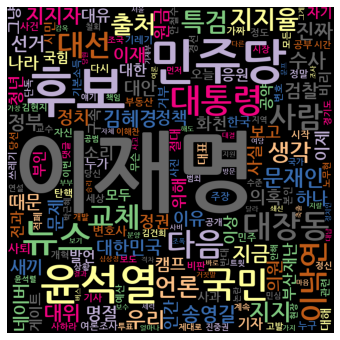

In [19]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'   # 원하는 폰트 지정

wordcloud = WordCloud(
    max_words=200, #최대 수용 단어 갯수
    background_color='black', #배경색상
    font_path=font_path,
    width = 800, #넓이
    height = 800, #길이
    colormap='Accent_r')
    
wordcloud.generate_from_frequencies(dict(noun_count))

fig =  plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/word_cloud.jpg')